<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python" data-toc-modified-id="Python-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python</a></span><ul class="toc-item"><li><span><a href="#Modelling" data-toc-modified-id="Modelling-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Linear regression</a></span></li></ul></li><li><span><a href="#Explore-relationship" data-toc-modified-id="Explore-relationship-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Explore relationship</a></span><ul class="toc-item"><li><span><a href="#decision-tree" data-toc-modified-id="decision-tree-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>decision tree</a></span></li></ul></li></ul></li></ul></div>

# Python

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('price_analytics.csv', index_col=[0])

In [3]:
data.head(20)

,Date,sku,unit_price,units
0,"Feb 15, 2021",M735H7159,55.71,262.0
1,"Feb 15, 2021",3637H1617,140.36,5.0
2,"Feb 15, 2021",P036H2062,68.03,13.0
3,"Feb 15, 2021",M630H8980,49.77,186.0
4,"Feb 15, 2021",P037H2072,68.03,5.0
5,"Feb 15, 2021",-233H1277,93.20,5.0
6,"Feb 15, 2021",P036H2066,74.11,6.0
7,"Feb 15, 2021",3635H0605,106.03,5.0
8,"Feb 15, 2021",2734H9994,11.31,6.0
9,"Feb 15, 2021",P036H2067,83.81,7.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1671 entries, 0 to 1670
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1671 non-null   object 
 1   sku         1671 non-null   object 
 2   unit_price  1671 non-null   float64
 3   units       1671 non-null   float64
dtypes: float64(2), object(2)
memory usage: 65.3+ KB


In [5]:
data.groupby('sku').units.sum()

sku
-232H1243       157.0
-232H1247       111.0
-233H1277       267.0
-233H1278       324.0
-233H1279       233.0
2734H9994       481.0
3630H2620       117.0
3635H0605        20.0
3636H1616        70.0
3637H0607        20.0
3637H1617       150.0
3638H1618        10.0
M630H8980     83888.0
M735H7159    105640.0
P036H2062      4201.0
P036H2065      2416.0
P036H2066      1391.0
P036H2067       530.0
P036H2068        83.0
P036H2069        40.0
P036H3063         5.0
P036H3064        11.0
P037H2070        35.0
P037H2071      1294.0
P037H2072      1063.0
Name: units, dtype: float64

The most sold products are:

No. 1 M735H7159 
No. 2 M630H8980

In [6]:
data.Date = pd.to_datetime(data.Date)

In [7]:
data.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

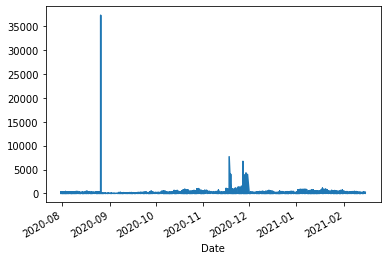

In [8]:
data.units.plot()

In [14]:
data.resample('d').sku.count().nlargest(5)

Date
2020-11-27    16
2020-11-17    13
2020-12-17    13
2020-12-28    13
2021-01-04    13
Name: sku, dtype: int64

In [16]:
data.units.nlargest(5)

Date
2020-08-26    37293.0
2020-11-18     7703.0
2020-11-27     6700.0
2020-11-29     4252.0
2020-11-19     3998.0
Name: units, dtype: float64

In [22]:
data[data['units'] == 37293]

,sku,unit_price,units
Date,,,
2020-08-26,M630H8980,28.42,37293.0


In [24]:
data.query('units == 37293')

,sku,unit_price,units
Date,,,
2020-08-26,M630H8980,28.42,37293.0


In [26]:
data.groupby('sku').units.sum().nlargest(5)

sku
M735H7159    105640.0
M630H8980     83888.0
P036H2062      4201.0
P036H2065      2416.0
P036H2066      1391.0
Name: units, dtype: float64

In [27]:
import seaborn as sns

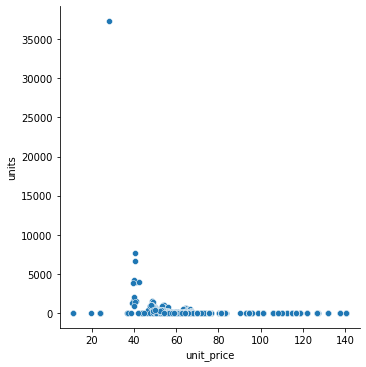

In [29]:
sns.relplot(data=data, x='unit_price', y='units')

In [41]:
data[data.sku.isin(['M630H8980'])].unit_price.describe()

count    178.000000
mean      52.608146
std        4.357880
min       28.420000
25%       51.027500
50%       53.815000
75%       55.277500
max       60.220000
Name: unit_price, dtype: float64

In [42]:
data[data.sku.isin(['M735H7159'])].unit_price.describe()

count    161.000000
mean      55.490807
std        7.048929
min       39.770000
25%       49.250000
50%       54.420000
75%       63.630000
max       68.030000
Name: unit_price, dtype: float64

In [37]:
data[data.sku.isin(['M735H7159','M630H8980'])]

,sku,unit_price,units
Date,,,
2021-02-15,M735H7159,55.71,262.0
2021-02-15,M630H8980,49.77,186.0
2021-02-14,M630H8980,49.03,233.0
2021-02-14,M735H7159,55.60,320.0
2021-02-13,M735H7159,54.67,241.0
...,...,...,...
2020-08-04,M630H8980,51.82,347.0
2020-08-03,M630H8980,52.72,411.0
2020-08-02,M630H8980,52.13,343.0


<AxesSubplot:xlabel='Date'>

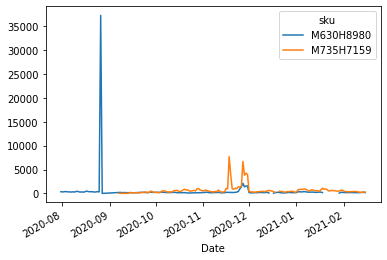

In [36]:
data[data.sku.isin(['M735H7159','M630H8980'])].reset_index().pivot_table(index='Date', columns='sku',values='units').plot()

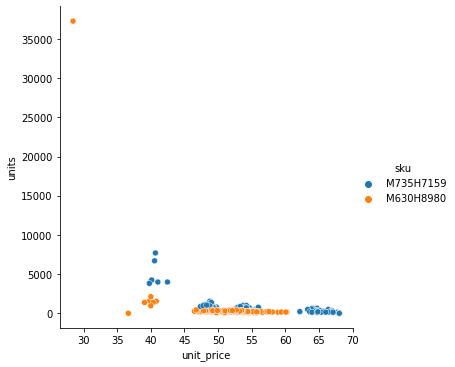

In [48]:
sns.relplot(data=data[data.sku.isin(['M735H7159','M630H8980'])],x='unit_price', y='units', hue='sku')

In [140]:
df = pd.merge(data[data.sku.isin(['M630H8980'])][['unit_price','units']].rename(columns={'unit_price':'M630H8980_unit_price','units':'M630H8980_units'}).reset_index(), data[data.sku.isin(['M735H7159'])][['unit_price','units']].rename(columns={'unit_price':'M735H7159_unit_price','units':'M735H7159_units'}).reset_index(), how='outer', on='Date')

In [141]:
df.dropna(inplace=True)

In [142]:
df.head()

,Date,M630H8980_unit_price,M630H8980_units,M735H7159_unit_price,M735H7159_units
0,2021-02-15,49.77,186.0,55.71,262.0
1,2021-02-14,49.03,233.0,55.60,320.0
2,2021-02-13,47.15,233.0,54.67,241.0
3,2021-02-12,48.12,188.0,55.20,242.0
4,2021-02-11,49.81,179.0,55.43,282.0


In [147]:
df_weekly = df.set_index('Date').resample('w').agg({'M630H8980_unit_price': 'mean', 'M630H8980_units': 'sum', 'M735H7159_unit_price': 'mean', 'M735H7159_units': 'sum'})

In [148]:
df_weekly.fillna(0, inplace=True)

In [150]:
df_weekly = df_weekly[(df_weekly.T != 0).any()]

In [151]:
df_weekly

,M630H8980_unit_price,M630H8980_units,M735H7159_unit_price,M735H7159_units
Date,,,,
2020-08-23,53.500000,372.0,68.030000,5.0
2020-09-13,58.025714,1273.0,68.030000,166.0
2020-09-20,56.871429,1251.0,66.258571,1021.0
2020-09-27,54.170000,1489.0,65.644286,1658.0
2020-10-04,53.967143,1650.0,64.848571,1842.0
2020-10-11,54.295714,1494.0,64.362857,2827.0
2020-10-18,55.014286,1316.0,64.584286,3613.0
2020-10-25,54.580000,879.0,54.158571,4659.0
2020-11-01,53.574286,1054.0,53.340000,5101.0


## Explore relationship

<AxesSubplot:xlabel='M630H8980_unit_price', ylabel='M630H8980_units'>

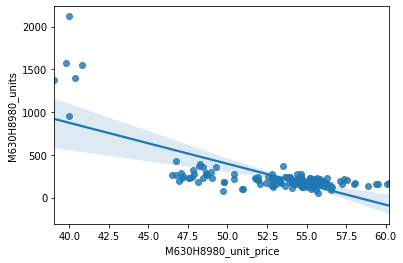

In [137]:
sns.regplot(data=df, x='M630H8980_unit_price', y='M630H8980_units')

<AxesSubplot:xlabel='M630H8980_unit_price', ylabel='M735H7159_units'>

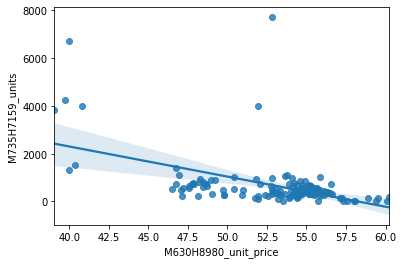

In [157]:
sns.regplot(data=df, x='M630H8980_unit_price', y='M735H7159_units')

<AxesSubplot:xlabel='M630H8980_unit_price', ylabel='M630H8980_units'>

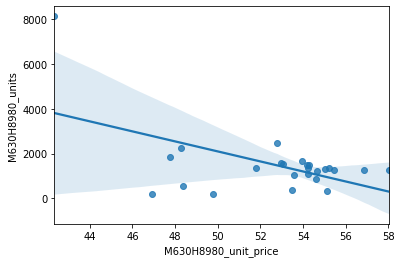

In [152]:
sns.regplot(data=df_weekly, x='M630H8980_unit_price', y='M630H8980_units')

<AxesSubplot:xlabel='M735H7159_units', ylabel='M630H8980_units'>

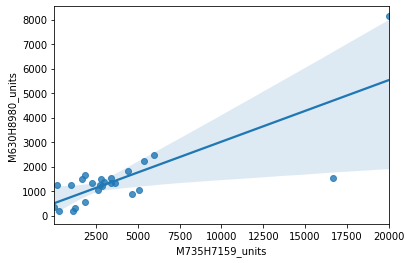

In [153]:
sns.regplot(data=df_weekly, x='M735H7159_units', y='M630H8980_units')

## Modelling

### Linear regression

In [ ]:
from sklearn.model_selection import cross_val_score

In [51]:
from sklearn.linear_model import LinearRegression

In [110]:
X = df[['M630H8980_unit_price', 'M630H8980_units', 'M735H7159_unit_price']]

In [79]:
y = df['M735H7159_units']

In [52]:
lr = LinearRegression()

In [80]:
lr.fit(X,y)

LinearRegression()

In [83]:
pred = lr.predict(X)

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='M735H7159_units'>

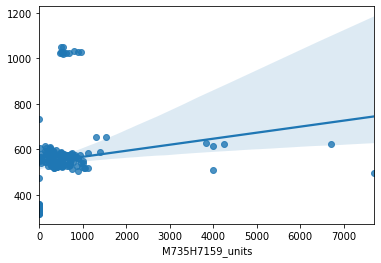

In [87]:
sns.regplot(y, pred)

In [90]:
cross_val_score(lr, X, y, cv=10)

array([-4.95050038e-01, -1.49368901e-01, -6.63982038e-01, -4.05486373e-01,
       -1.35608899e-01, -7.01761931e-01, -7.44546823e+00, -6.91799931e+04,
       -5.34173340e+05, -2.29600083e+02])

### decision tree

In [92]:
from sklearn.tree import DecisionTreeRegressor

In [89]:
tree = DecisionTreeRegressor(random_state=0)
cross_val_score(tree, X, y, cv=10)

array([ 1.98817050e-01, -2.37943964e+00, -6.71237987e-01,  8.47253812e-01,
        5.30917559e-02, -3.20345539e+00, -3.05800172e+00, -3.99617699e+02,
       -3.45088889e+01,  7.54412915e-01])

In [94]:
X

,M630H8980_unit_price,M630H8980_units,M735H7159_unit_price
0,49.77,186.0,55.71
1,49.03,233.0,55.60
2,47.15,233.0,54.67
3,48.12,188.0,55.20
4,49.81,179.0,55.43
...,...,...,...
185,0.00,0.0,49.74
186,0.00,0.0,49.05
187,0.00,0.0,49.33
188,0.00,0.0,53.62
